# Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus.
These data track ridership on buses in the UT area.
Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop.
Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018.
The variables are:

-   timestamp: the beginning of the 15-minute window for that row of data

-   boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window

-   alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window

-   day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.

-   temperature: temperature at that time in degrees F hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.

-   month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question.
Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning.
Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing.
(Faceting/panel plots might be especially useful here.)

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
capmetro = pd.read_csv('capmetro_UT.csv')
capmetro.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


Add a month column to the dataframe:

In [3]:
capmetro['month'] = capmetro['timestamp'].map(lambda x: x[5:7])
capmetro['month'] = capmetro['month'].map(lambda x: 'September' if x == '09' else
                                          'October' if x == '10' else 'November')

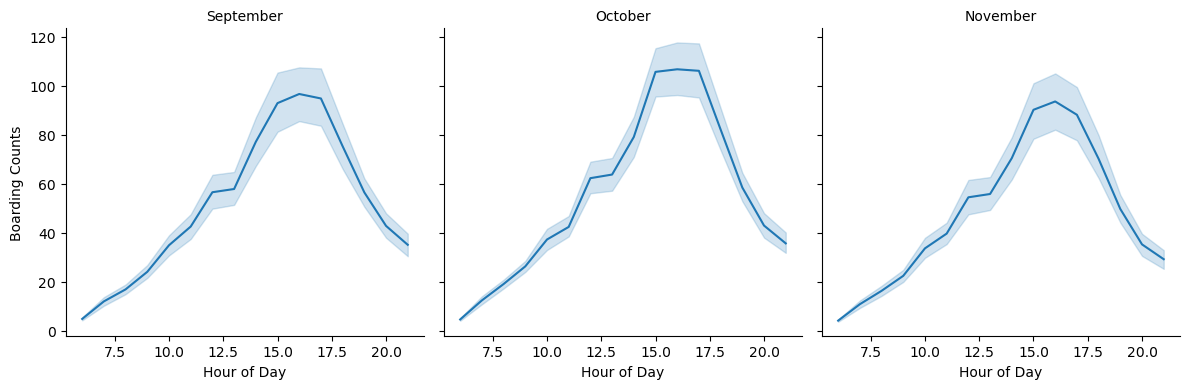

In [4]:
g = sns.FacetGrid(capmetro, col='month', col_wrap=3, height=4)
g.map(sns.lineplot, 'hour_of_day', 'boarding')
g.set_axis_labels('Hour of Day', 'Boarding Counts')
g.set_titles(col_template="{col_name}")
plt.show()

<AxesSubplot:title={'center':'Boarding Passengers by Hour of the Day and Weekday/Weekend'}, xlabel='Hour of the Day', ylabel='Average Boarding'>

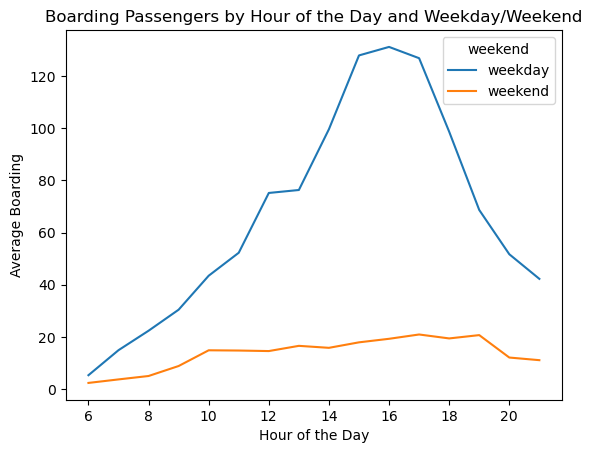

In [5]:
capmetro.groupby(['hour_of_day', 'weekend'])['boarding'].agg('mean').unstack().plot(kind='line', title = 'Boarding Passengers by Hour of the Day and Weekday/Weekend', xlabel='Hour of the Day', ylabel='Average Boarding')

<AxesSubplot:title={'center':'Alighting Passengers by Hour of the Day and Weekday/Weekend'}, xlabel='Hour of the Day', ylabel='Average Alighting'>

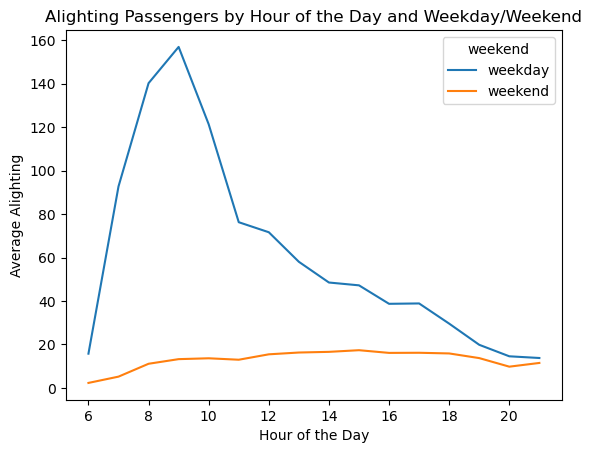

In [6]:
capmetro.groupby(['hour_of_day', 'weekend'])['alighting'].agg('mean').unstack().plot(kind='line',  title = 'Alighting Passengers by Hour of the Day and Weekday/Weekend', xlabel='Hour of the Day', ylabel='Average Alighting')

<AxesSubplot:title={'center':'Boarding Passengers by Temperature and Weekday/Weekend'}, xlabel='Temperature Categories', ylabel='Average Boarding'>

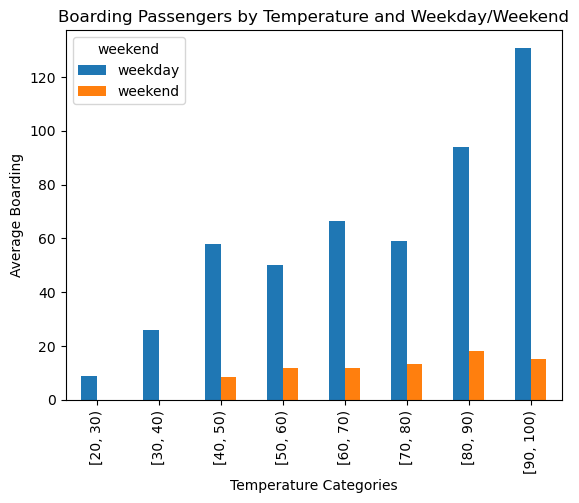

In [7]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

capmetro['temp_group'] = pd.cut(capmetro['temperature'], bins=bins, right=False)
capmetro.groupby(['temp_group', 'weekend'])['boarding'].agg('mean').unstack().plot(kind='bar', title = 'Boarding Passengers by Temperature and Weekday/Weekend', xlabel='Temperature Categories', ylabel='Average Boarding')

#### The number of people getting on the bus on the weekdays increases quickly around 9 am and shoots up around 4-5 pm. This makes sense as these are typical commuter times. For the weekends, the numbers of people boarding are generally less overall, with a slight and steady increase starting around 10 am. The time with the highest average number of people alighting is around 9 am. This also makes sense as one could assume people are commuting and arriving at their destination (college or work). This graph was fairly intuitive. We can see that the number of people boarding a bus skyrockets as the temperature increases. No one wants to be walking around in 90 degree weather. What was interesting was that on weekends, the number is quite low, but on weekdays we see far more people using the bus. October had the highest number of people using the bus. Perhaps this is because that is when school is in session with no major holidays. Overall, it was interesting to look at a combination of two variables while visualizing the difference between weekdays and weekends. 

<br><br><br>